<a href="https://colab.research.google.com/github/smitasasindran/era4/blob/session7/Session7/ERA4_Session7_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Notes:

This iteration converts to modular code. There are three files:
1. model.py - contains the model  
2. datasets_transforms.py - contains transformations with albumentations, and datasets/dataloaders
3. utils.py - contains helper functions + train and test loops   

Model architecture is C1C2C3C40, with no Maxpooling.   
 * Total params:    
 * Total epochs:100    
 * Final Test Accuracy:     

[ToDo: figure out how to use Dilated kernels instead of strided convolution in conv block1 ]

## Import Libraries

In [12]:
from __future__ import print_function
import torch
import torch.optim as optim
import torchvision
import numpy as np

import utils
import dataset_transforms
from model import Net


In [13]:
!pip install torchsummary
!pip install albumentations

### Create transforms and Dataloaders



In [14]:
# Create albumentations transforms
train_transforms, test_transforms = dataset_transforms.create_albumentations_transforms()

# Create Train/Test split
train, test = dataset_transforms.load_albumentations_dataset(train_transforms, test_transforms)

# Set random seed and batch size
use_cuda = utils.init_setup()
batch_size = 512#256

# Create data loaders
train_loader, test_loader = utils.get_dataloaders(train, test, use_cuda, batch_size)


/usr/local/lib/python3.12/dist-packages/albumentations/core/validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)
/content/dataset_transforms.py:50: UserWarning: Argument(s) 'max_holes, max_height, max_width, min_holes, min_height, min_width, fill_value, mask_fill_value' are not valid for transform CoarseDropout
  A.CoarseDropout(p=0.5, max_holes=1, max_height=16, max_width=16, min_holes=1, min_height=16, min_width=16,


CUDA Available? True


## Data Statistics

torch.Size([512, 3, 32, 32])
torch.Size([512])


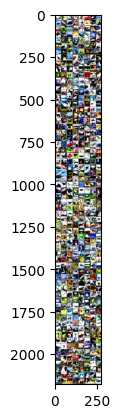

ship  bird  cat   dog   bird  truck truck plane plane ship  truck frog  bird  bird  dog   frog  ship  deer  horse truck horse horse dog   cat   cat   truck ship  plane car   truck frog  frog  bird  deer  frog  plane deer  truck car   car   horse cat   deer  ship  truck plane frog  ship  plane cat   bird  bird  frog  frog  plane truck cat   bird  ship  bird  bird  deer  bird  frog  ship  deer  deer  truck truck deer  horse cat   dog   truck truck dog   deer  car   dog   car   dog   dog   deer  truck bird  frog  ship  dog   ship  dog   frog  ship  car   dog   car   horse ship  frog  deer  deer  ship  cat   cat   frog  horse ship  horse car   car   truck bird  bird  dog   ship  truck cat   ship  deer  deer  dog   car   ship  dog   horse deer  cat   deer  car   dog   plane bird  truck cat   cat   cat   ship  horse frog  plane dog   bird  truck frog  dog   car   car   horse plane truck cat   bird  car   cat   car   deer  car   ship  horse plane frog  dog   truck deer  bird  car   deer  hors

In [15]:
# Check some images

dataiter = iter(train_loader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt

# img = np.moveaxis(images[0].numpy(), 0, -1)
# plt.imshow(img)

def imshow(img):
        img = img / 2 + 0.5  # Unnormalize
        npimg = img.numpy()
        plt.imshow(np.transpose(npimg, (1, 2, 0)))
        plt.show()


classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Show images
imshow(torchvision.utils.make_grid(images))

# Print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(len(labels))))


## Model Summary

In [16]:
device = torch.device("cuda" if use_cuda else "cpu")
model_cifar = Net().to(device)
utils.model_summary(model_cifar)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
       BatchNorm2d-3           [-1, 16, 32, 32]              32
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           4,608
              ReLU-6           [-1, 32, 32, 32]               0
       BatchNorm2d-7           [-1, 32, 32, 32]              64
           Dropout-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 32, 32, 32]           9,216
             ReLU-10           [-1, 32, 32, 32]               0
      BatchNorm2d-11           [-1, 32, 32, 32]              64
          Dropout-12           [-1, 32, 32, 32]               0
           Conv2d-13           [-1, 64, 15, 15]          18,432
             ReLU-14           [-1, 64,

## Train and Test accumulator variables

In [17]:
train_losses = []
test_losses = []
train_acc = []
test_acc = []


## Training

In [18]:
model_cifar = Net().to(device)
optimizer = optim.SGD(model_cifar.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 100

for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    utils.train(model_cifar, device, train_loader, optimizer, epoch, train_losses, train_acc)
    utils.test(model_cifar, device, test_loader, test_losses, test_acc)

EPOCH: 0


Loss=1.7413620948791504 Batch_id=97 Accuracy=23.62: 100%|██████████| 98/98 [00:28<00:00,  3.50it/s]



Test set: Average loss: 1.8059, Accuracy: 3200/10000 (32.00%)

EPOCH: 1


Loss=1.5378060340881348 Batch_id=97 Accuracy=38.06: 100%|██████████| 98/98 [00:22<00:00,  4.41it/s]



Test set: Average loss: 1.5283, Accuracy: 4294/10000 (42.94%)

EPOCH: 2


Loss=1.3950903415679932 Batch_id=97 Accuracy=45.26: 100%|██████████| 98/98 [00:22<00:00,  4.45it/s]



Test set: Average loss: 1.4391, Accuracy: 4735/10000 (47.35%)

EPOCH: 3


Loss=1.3774116039276123 Batch_id=97 Accuracy=50.14: 100%|██████████| 98/98 [00:22<00:00,  4.31it/s]



Test set: Average loss: 1.3148, Accuracy: 5267/10000 (52.67%)

EPOCH: 4


Loss=1.3260515928268433 Batch_id=97 Accuracy=53.42: 100%|██████████| 98/98 [00:23<00:00,  4.11it/s]



Test set: Average loss: 1.5098, Accuracy: 4912/10000 (49.12%)

EPOCH: 5


Loss=1.158794641494751 Batch_id=97 Accuracy=56.31: 100%|██████████| 98/98 [00:24<00:00,  3.98it/s]



Test set: Average loss: 1.1059, Accuracy: 6051/10000 (60.51%)

EPOCH: 6


Loss=1.035172462463379 Batch_id=97 Accuracy=58.84: 100%|██████████| 98/98 [00:23<00:00,  4.15it/s]



Test set: Average loss: 1.0677, Accuracy: 6165/10000 (61.65%)

EPOCH: 7


Loss=0.8948017358779907 Batch_id=97 Accuracy=60.87: 100%|██████████| 98/98 [00:23<00:00,  4.19it/s]



Test set: Average loss: 1.0046, Accuracy: 6431/10000 (64.31%)

EPOCH: 8


Loss=0.9927759766578674 Batch_id=97 Accuracy=62.71: 100%|██████████| 98/98 [00:23<00:00,  4.21it/s]



Test set: Average loss: 0.9495, Accuracy: 6584/10000 (65.84%)

EPOCH: 9


Loss=0.9967424273490906 Batch_id=97 Accuracy=64.34: 100%|██████████| 98/98 [00:23<00:00,  4.16it/s]



Test set: Average loss: 0.9260, Accuracy: 6644/10000 (66.44%)

EPOCH: 10


Loss=1.005213737487793 Batch_id=97 Accuracy=65.68: 100%|██████████| 98/98 [00:23<00:00,  4.17it/s]



Test set: Average loss: 0.8887, Accuracy: 6824/10000 (68.24%)

EPOCH: 11


Loss=0.8990916013717651 Batch_id=97 Accuracy=67.26: 100%|██████████| 98/98 [00:22<00:00,  4.35it/s]



Test set: Average loss: 0.8569, Accuracy: 6975/10000 (69.75%)

EPOCH: 12


Loss=0.8488578796386719 Batch_id=97 Accuracy=68.11: 100%|██████████| 98/98 [00:23<00:00,  4.15it/s]



Test set: Average loss: 0.8573, Accuracy: 7029/10000 (70.29%)

EPOCH: 13


Loss=0.8634069561958313 Batch_id=97 Accuracy=69.14: 100%|██████████| 98/98 [00:22<00:00,  4.43it/s]



Test set: Average loss: 0.7791, Accuracy: 7285/10000 (72.85%)

EPOCH: 14


Loss=0.8017274737358093 Batch_id=97 Accuracy=70.16: 100%|██████████| 98/98 [00:22<00:00,  4.40it/s]



Test set: Average loss: 0.7556, Accuracy: 7321/10000 (73.21%)

EPOCH: 15


Loss=0.7759255170822144 Batch_id=97 Accuracy=70.71: 100%|██████████| 98/98 [00:23<00:00,  4.18it/s]



Test set: Average loss: 0.7442, Accuracy: 7399/10000 (73.99%)

EPOCH: 16


Loss=0.8279566168785095 Batch_id=97 Accuracy=71.30: 100%|██████████| 98/98 [00:23<00:00,  4.19it/s]



Test set: Average loss: 0.7219, Accuracy: 7484/10000 (74.84%)

EPOCH: 17


Loss=0.7839778661727905 Batch_id=97 Accuracy=72.18: 100%|██████████| 98/98 [00:23<00:00,  4.23it/s]



Test set: Average loss: 0.7170, Accuracy: 7530/10000 (75.30%)

EPOCH: 18


Loss=0.7035858631134033 Batch_id=97 Accuracy=72.87: 100%|██████████| 98/98 [00:21<00:00,  4.50it/s]



Test set: Average loss: 0.7022, Accuracy: 7573/10000 (75.73%)

EPOCH: 19


Loss=0.8342922925949097 Batch_id=97 Accuracy=73.27: 100%|██████████| 98/98 [00:23<00:00,  4.20it/s]



Test set: Average loss: 0.7035, Accuracy: 7555/10000 (75.55%)

EPOCH: 20


Loss=0.7316886186599731 Batch_id=97 Accuracy=73.48: 100%|██████████| 98/98 [00:23<00:00,  4.21it/s]



Test set: Average loss: 0.7166, Accuracy: 7533/10000 (75.33%)

EPOCH: 21


Loss=0.6941269636154175 Batch_id=97 Accuracy=74.40: 100%|██████████| 98/98 [00:23<00:00,  4.20it/s]



Test set: Average loss: 0.6844, Accuracy: 7614/10000 (76.14%)

EPOCH: 22


Loss=0.7504563331604004 Batch_id=97 Accuracy=74.67: 100%|██████████| 98/98 [00:23<00:00,  4.22it/s]



Test set: Average loss: 0.6409, Accuracy: 7795/10000 (77.95%)

EPOCH: 23


Loss=0.7254207730293274 Batch_id=97 Accuracy=74.64: 100%|██████████| 98/98 [00:22<00:00,  4.45it/s]



Test set: Average loss: 0.6443, Accuracy: 7779/10000 (77.79%)

EPOCH: 24


Loss=0.7240443229675293 Batch_id=97 Accuracy=75.15: 100%|██████████| 98/98 [00:21<00:00,  4.62it/s]



Test set: Average loss: 0.6314, Accuracy: 7808/10000 (78.08%)

EPOCH: 25


Loss=0.7353869676589966 Batch_id=97 Accuracy=75.53: 100%|██████████| 98/98 [00:22<00:00,  4.38it/s]



Test set: Average loss: 0.6803, Accuracy: 7701/10000 (77.01%)

EPOCH: 26


Loss=0.6813313961029053 Batch_id=97 Accuracy=75.88: 100%|██████████| 98/98 [00:23<00:00,  4.09it/s]



Test set: Average loss: 0.6320, Accuracy: 7792/10000 (77.92%)

EPOCH: 27


Loss=0.7100039124488831 Batch_id=97 Accuracy=76.26: 100%|██████████| 98/98 [00:22<00:00,  4.30it/s]



Test set: Average loss: 0.6260, Accuracy: 7781/10000 (77.81%)

EPOCH: 28


Loss=0.7028106451034546 Batch_id=97 Accuracy=76.64: 100%|██████████| 98/98 [00:22<00:00,  4.32it/s]



Test set: Average loss: 0.6066, Accuracy: 7911/10000 (79.11%)

EPOCH: 29


Loss=0.6336072087287903 Batch_id=97 Accuracy=76.90: 100%|██████████| 98/98 [00:22<00:00,  4.41it/s]



Test set: Average loss: 0.6153, Accuracy: 7904/10000 (79.04%)

EPOCH: 30


Loss=0.6580600738525391 Batch_id=97 Accuracy=77.11: 100%|██████████| 98/98 [00:21<00:00,  4.50it/s]



Test set: Average loss: 0.5973, Accuracy: 7974/10000 (79.74%)

EPOCH: 31


Loss=0.6905443072319031 Batch_id=97 Accuracy=77.30: 100%|██████████| 98/98 [00:21<00:00,  4.55it/s]



Test set: Average loss: 0.5990, Accuracy: 7930/10000 (79.30%)

EPOCH: 32


Loss=0.6357857584953308 Batch_id=97 Accuracy=77.59: 100%|██████████| 98/98 [00:22<00:00,  4.37it/s]



Test set: Average loss: 0.5773, Accuracy: 8008/10000 (80.08%)

EPOCH: 33


Loss=0.7395530939102173 Batch_id=97 Accuracy=77.61: 100%|██████████| 98/98 [00:22<00:00,  4.31it/s]



Test set: Average loss: 0.5801, Accuracy: 7998/10000 (79.98%)

EPOCH: 34


Loss=0.6075975298881531 Batch_id=97 Accuracy=78.16: 100%|██████████| 98/98 [00:23<00:00,  4.13it/s]



Test set: Average loss: 0.5704, Accuracy: 7992/10000 (79.92%)

EPOCH: 35


Loss=0.6757559776306152 Batch_id=97 Accuracy=78.53: 100%|██████████| 98/98 [00:22<00:00,  4.30it/s]



Test set: Average loss: 0.5793, Accuracy: 8044/10000 (80.44%)

EPOCH: 36


Loss=0.6212174296379089 Batch_id=97 Accuracy=78.67: 100%|██████████| 98/98 [00:22<00:00,  4.33it/s]



Test set: Average loss: 0.5602, Accuracy: 8067/10000 (80.67%)

EPOCH: 37


Loss=0.6535847783088684 Batch_id=97 Accuracy=78.64: 100%|██████████| 98/98 [00:21<00:00,  4.50it/s]



Test set: Average loss: 0.5526, Accuracy: 8060/10000 (80.60%)

EPOCH: 38


Loss=0.5778596997261047 Batch_id=97 Accuracy=78.73: 100%|██████████| 98/98 [00:21<00:00,  4.53it/s]



Test set: Average loss: 0.5632, Accuracy: 8105/10000 (81.05%)

EPOCH: 39


Loss=0.5344620943069458 Batch_id=97 Accuracy=79.07: 100%|██████████| 98/98 [00:22<00:00,  4.35it/s]



Test set: Average loss: 0.5475, Accuracy: 8123/10000 (81.23%)

EPOCH: 40


Loss=0.6843263506889343 Batch_id=97 Accuracy=79.13: 100%|██████████| 98/98 [00:22<00:00,  4.27it/s]



Test set: Average loss: 0.5391, Accuracy: 8164/10000 (81.64%)

EPOCH: 41


Loss=0.508983314037323 Batch_id=97 Accuracy=79.14: 100%|██████████| 98/98 [00:24<00:00,  4.04it/s]



Test set: Average loss: 0.5662, Accuracy: 8072/10000 (80.72%)

EPOCH: 42


Loss=0.7779150605201721 Batch_id=97 Accuracy=79.56: 100%|██████████| 98/98 [00:22<00:00,  4.34it/s]



Test set: Average loss: 0.5577, Accuracy: 8109/10000 (81.09%)

EPOCH: 43


Loss=0.5177450776100159 Batch_id=97 Accuracy=79.47: 100%|██████████| 98/98 [00:22<00:00,  4.37it/s]



Test set: Average loss: 0.5434, Accuracy: 8188/10000 (81.88%)

EPOCH: 44


Loss=0.6000171899795532 Batch_id=97 Accuracy=79.72: 100%|██████████| 98/98 [00:22<00:00,  4.45it/s]



Test set: Average loss: 0.5206, Accuracy: 8232/10000 (82.32%)

EPOCH: 45


Loss=0.5468059778213501 Batch_id=97 Accuracy=79.99: 100%|██████████| 98/98 [00:21<00:00,  4.48it/s]



Test set: Average loss: 0.5248, Accuracy: 8214/10000 (82.14%)

EPOCH: 46


Loss=0.5861441493034363 Batch_id=97 Accuracy=79.97: 100%|██████████| 98/98 [00:22<00:00,  4.41it/s]



Test set: Average loss: 0.5145, Accuracy: 8239/10000 (82.39%)

EPOCH: 47


Loss=0.5960364937782288 Batch_id=97 Accuracy=80.43: 100%|██████████| 98/98 [00:22<00:00,  4.27it/s]



Test set: Average loss: 0.5319, Accuracy: 8186/10000 (81.86%)

EPOCH: 48


Loss=0.6651081442832947 Batch_id=97 Accuracy=80.42: 100%|██████████| 98/98 [00:24<00:00,  4.05it/s]



Test set: Average loss: 0.5207, Accuracy: 8250/10000 (82.50%)

EPOCH: 49


Loss=0.5649245381355286 Batch_id=97 Accuracy=80.49: 100%|██████████| 98/98 [00:23<00:00,  4.23it/s]



Test set: Average loss: 0.5312, Accuracy: 8195/10000 (81.95%)

EPOCH: 50


Loss=0.5595096349716187 Batch_id=97 Accuracy=80.44: 100%|██████████| 98/98 [00:23<00:00,  4.22it/s]



Test set: Average loss: 0.5099, Accuracy: 8277/10000 (82.77%)

EPOCH: 51


Loss=0.5570975542068481 Batch_id=97 Accuracy=80.48: 100%|██████████| 98/98 [00:23<00:00,  4.19it/s]



Test set: Average loss: 0.5199, Accuracy: 8241/10000 (82.41%)

EPOCH: 52


Loss=0.5109407305717468 Batch_id=97 Accuracy=80.65: 100%|██████████| 98/98 [00:23<00:00,  4.23it/s]



Test set: Average loss: 0.5111, Accuracy: 8240/10000 (82.40%)

EPOCH: 53


Loss=0.5995852947235107 Batch_id=97 Accuracy=80.85: 100%|██████████| 98/98 [00:21<00:00,  4.47it/s]



Test set: Average loss: 0.5032, Accuracy: 8225/10000 (82.25%)

EPOCH: 54


Loss=0.5758377909660339 Batch_id=97 Accuracy=80.91: 100%|██████████| 98/98 [00:21<00:00,  4.53it/s]



Test set: Average loss: 0.5185, Accuracy: 8243/10000 (82.43%)

EPOCH: 55


Loss=0.6161870360374451 Batch_id=97 Accuracy=80.97: 100%|██████████| 98/98 [00:23<00:00,  4.21it/s]



Test set: Average loss: 0.5025, Accuracy: 8321/10000 (83.21%)

EPOCH: 56


Loss=0.6617281436920166 Batch_id=97 Accuracy=81.30: 100%|██████████| 98/98 [00:23<00:00,  4.26it/s]



Test set: Average loss: 0.4957, Accuracy: 8312/10000 (83.12%)

EPOCH: 57


Loss=0.5906693339347839 Batch_id=97 Accuracy=81.34: 100%|██████████| 98/98 [00:23<00:00,  4.20it/s]



Test set: Average loss: 0.5036, Accuracy: 8279/10000 (82.79%)

EPOCH: 58


Loss=0.6120377779006958 Batch_id=97 Accuracy=81.34: 100%|██████████| 98/98 [00:22<00:00,  4.27it/s]



Test set: Average loss: 0.5020, Accuracy: 8317/10000 (83.17%)

EPOCH: 59


Loss=0.5648664832115173 Batch_id=97 Accuracy=81.48: 100%|██████████| 98/98 [00:22<00:00,  4.32it/s]



Test set: Average loss: 0.4931, Accuracy: 8292/10000 (82.92%)

EPOCH: 60


Loss=0.5225988030433655 Batch_id=97 Accuracy=81.64: 100%|██████████| 98/98 [00:22<00:00,  4.28it/s]



Test set: Average loss: 0.4915, Accuracy: 8328/10000 (83.28%)

EPOCH: 61


Loss=0.5421410202980042 Batch_id=97 Accuracy=81.50: 100%|██████████| 98/98 [00:21<00:00,  4.49it/s]



Test set: Average loss: 0.4857, Accuracy: 8343/10000 (83.43%)

EPOCH: 62


Loss=0.5343368649482727 Batch_id=97 Accuracy=81.80: 100%|██████████| 98/98 [00:21<00:00,  4.52it/s]



Test set: Average loss: 0.4960, Accuracy: 8315/10000 (83.15%)

EPOCH: 63


Loss=0.5248463749885559 Batch_id=97 Accuracy=81.86: 100%|██████████| 98/98 [00:23<00:00,  4.16it/s]



Test set: Average loss: 0.4920, Accuracy: 8307/10000 (83.07%)

EPOCH: 64


Loss=0.5641595125198364 Batch_id=97 Accuracy=81.50: 100%|██████████| 98/98 [00:22<00:00,  4.33it/s]



Test set: Average loss: 0.4812, Accuracy: 8351/10000 (83.51%)

EPOCH: 65


Loss=0.6071019768714905 Batch_id=97 Accuracy=81.91: 100%|██████████| 98/98 [00:22<00:00,  4.34it/s]



Test set: Average loss: 0.4789, Accuracy: 8379/10000 (83.79%)

EPOCH: 66


Loss=0.49431827664375305 Batch_id=97 Accuracy=82.02: 100%|██████████| 98/98 [00:23<00:00,  4.22it/s]



Test set: Average loss: 0.4787, Accuracy: 8397/10000 (83.97%)

EPOCH: 67


Loss=0.5231242775917053 Batch_id=97 Accuracy=81.99: 100%|██████████| 98/98 [00:24<00:00,  4.06it/s]



Test set: Average loss: 0.4874, Accuracy: 8355/10000 (83.55%)

EPOCH: 68


Loss=0.49724769592285156 Batch_id=97 Accuracy=82.17: 100%|██████████| 98/98 [00:24<00:00,  4.08it/s]



Test set: Average loss: 0.4790, Accuracy: 8389/10000 (83.89%)

EPOCH: 69


Loss=0.5409156084060669 Batch_id=97 Accuracy=82.08: 100%|██████████| 98/98 [00:24<00:00,  3.96it/s]



Test set: Average loss: 0.4698, Accuracy: 8386/10000 (83.86%)

EPOCH: 70


Loss=0.5387476086616516 Batch_id=97 Accuracy=82.42: 100%|██████████| 98/98 [00:24<00:00,  4.07it/s]



Test set: Average loss: 0.4541, Accuracy: 8468/10000 (84.68%)

EPOCH: 71


Loss=0.5469912886619568 Batch_id=97 Accuracy=82.33: 100%|██████████| 98/98 [00:21<00:00,  4.64it/s]



Test set: Average loss: 0.4742, Accuracy: 8397/10000 (83.97%)

EPOCH: 72


Loss=0.4674704372882843 Batch_id=97 Accuracy=82.53: 100%|██████████| 98/98 [00:22<00:00,  4.38it/s]



Test set: Average loss: 0.4601, Accuracy: 8407/10000 (84.07%)

EPOCH: 73


Loss=0.496325820684433 Batch_id=97 Accuracy=82.53: 100%|██████████| 98/98 [00:22<00:00,  4.28it/s]



Test set: Average loss: 0.4740, Accuracy: 8396/10000 (83.96%)

EPOCH: 74


Loss=0.4943588674068451 Batch_id=97 Accuracy=82.61: 100%|██████████| 98/98 [00:22<00:00,  4.35it/s]



Test set: Average loss: 0.4756, Accuracy: 8400/10000 (84.00%)

EPOCH: 75


Loss=0.5091111063957214 Batch_id=97 Accuracy=82.72: 100%|██████████| 98/98 [00:23<00:00,  4.23it/s]



Test set: Average loss: 0.4693, Accuracy: 8399/10000 (83.99%)

EPOCH: 76


Loss=0.47624701261520386 Batch_id=97 Accuracy=82.57: 100%|██████████| 98/98 [00:22<00:00,  4.33it/s]



Test set: Average loss: 0.4774, Accuracy: 8403/10000 (84.03%)

EPOCH: 77


Loss=0.4503154754638672 Batch_id=97 Accuracy=82.75: 100%|██████████| 98/98 [00:23<00:00,  4.19it/s]



Test set: Average loss: 0.4604, Accuracy: 8437/10000 (84.37%)

EPOCH: 78


Loss=0.49407094717025757 Batch_id=97 Accuracy=82.80: 100%|██████████| 98/98 [00:21<00:00,  4.50it/s]



Test set: Average loss: 0.4584, Accuracy: 8473/10000 (84.73%)

EPOCH: 79


Loss=0.44101279973983765 Batch_id=97 Accuracy=82.56: 100%|██████████| 98/98 [00:21<00:00,  4.47it/s]



Test set: Average loss: 0.4686, Accuracy: 8417/10000 (84.17%)

EPOCH: 80


Loss=0.5591083765029907 Batch_id=97 Accuracy=82.91: 100%|██████████| 98/98 [00:22<00:00,  4.29it/s]



Test set: Average loss: 0.4584, Accuracy: 8444/10000 (84.44%)

EPOCH: 81


Loss=0.5680042505264282 Batch_id=97 Accuracy=82.99: 100%|██████████| 98/98 [00:23<00:00,  4.26it/s]



Test set: Average loss: 0.4672, Accuracy: 8448/10000 (84.48%)

EPOCH: 82


Loss=0.5072068572044373 Batch_id=97 Accuracy=82.87: 100%|██████████| 98/98 [00:23<00:00,  4.23it/s]



Test set: Average loss: 0.4625, Accuracy: 8437/10000 (84.37%)

EPOCH: 83


Loss=0.4438026547431946 Batch_id=97 Accuracy=82.77: 100%|██████████| 98/98 [00:22<00:00,  4.29it/s]



Test set: Average loss: 0.4566, Accuracy: 8448/10000 (84.48%)

EPOCH: 84


Loss=0.5343326330184937 Batch_id=97 Accuracy=83.27: 100%|██████████| 98/98 [00:22<00:00,  4.44it/s]



Test set: Average loss: 0.4571, Accuracy: 8444/10000 (84.44%)

EPOCH: 85


Loss=0.4479149281978607 Batch_id=97 Accuracy=83.17: 100%|██████████| 98/98 [00:22<00:00,  4.43it/s]



Test set: Average loss: 0.4559, Accuracy: 8455/10000 (84.55%)

EPOCH: 86


Loss=0.4800570011138916 Batch_id=97 Accuracy=83.03: 100%|██████████| 98/98 [00:22<00:00,  4.30it/s]



Test set: Average loss: 0.4442, Accuracy: 8494/10000 (84.94%)

EPOCH: 87


Loss=0.5229472517967224 Batch_id=97 Accuracy=83.10: 100%|██████████| 98/98 [00:22<00:00,  4.29it/s]



Test set: Average loss: 0.4485, Accuracy: 8447/10000 (84.47%)

EPOCH: 88


Loss=0.42676815390586853 Batch_id=97 Accuracy=83.17: 100%|██████████| 98/98 [00:22<00:00,  4.27it/s]



Test set: Average loss: 0.4670, Accuracy: 8440/10000 (84.40%)

EPOCH: 89


Loss=0.4619333744049072 Batch_id=97 Accuracy=83.47: 100%|██████████| 98/98 [00:23<00:00,  4.26it/s]



Test set: Average loss: 0.4483, Accuracy: 8493/10000 (84.93%)

EPOCH: 90


Loss=0.43984875082969666 Batch_id=97 Accuracy=83.43: 100%|██████████| 98/98 [00:22<00:00,  4.29it/s]



Test set: Average loss: 0.4502, Accuracy: 8463/10000 (84.63%)

EPOCH: 91


Loss=0.5051495432853699 Batch_id=97 Accuracy=83.39: 100%|██████████| 98/98 [00:22<00:00,  4.43it/s]



Test set: Average loss: 0.4472, Accuracy: 8496/10000 (84.96%)

EPOCH: 92


Loss=0.44006478786468506 Batch_id=97 Accuracy=83.43: 100%|██████████| 98/98 [00:22<00:00,  4.34it/s]



Test set: Average loss: 0.4545, Accuracy: 8454/10000 (84.54%)

EPOCH: 93


Loss=0.48896679282188416 Batch_id=97 Accuracy=83.44: 100%|██████████| 98/98 [00:21<00:00,  4.54it/s]



Test set: Average loss: 0.4435, Accuracy: 8500/10000 (85.00%)

EPOCH: 94


Loss=0.4491724371910095 Batch_id=97 Accuracy=83.67: 100%|██████████| 98/98 [00:22<00:00,  4.41it/s]



Test set: Average loss: 0.4561, Accuracy: 8457/10000 (84.57%)

EPOCH: 95


Loss=0.5385348200798035 Batch_id=97 Accuracy=83.58: 100%|██████████| 98/98 [00:22<00:00,  4.29it/s]



Test set: Average loss: 0.4525, Accuracy: 8449/10000 (84.49%)

EPOCH: 96


Loss=0.4645453989505768 Batch_id=97 Accuracy=83.56: 100%|██████████| 98/98 [00:22<00:00,  4.29it/s]



Test set: Average loss: 0.4443, Accuracy: 8511/10000 (85.11%)

EPOCH: 97


Loss=0.49928173422813416 Batch_id=97 Accuracy=83.55: 100%|██████████| 98/98 [00:22<00:00,  4.33it/s]



Test set: Average loss: 0.4389, Accuracy: 8512/10000 (85.12%)

EPOCH: 98


Loss=0.5388821959495544 Batch_id=97 Accuracy=83.47: 100%|██████████| 98/98 [00:22<00:00,  4.45it/s]



Test set: Average loss: 0.4435, Accuracy: 8522/10000 (85.22%)

EPOCH: 99


Loss=0.5077497363090515 Batch_id=97 Accuracy=83.70: 100%|██████████| 98/98 [00:22<00:00,  4.28it/s]



Test set: Average loss: 0.4417, Accuracy: 8503/10000 (85.03%)



## Accuracy and Loss curves

Text(0.5, 1.0, 'Test Accuracy')

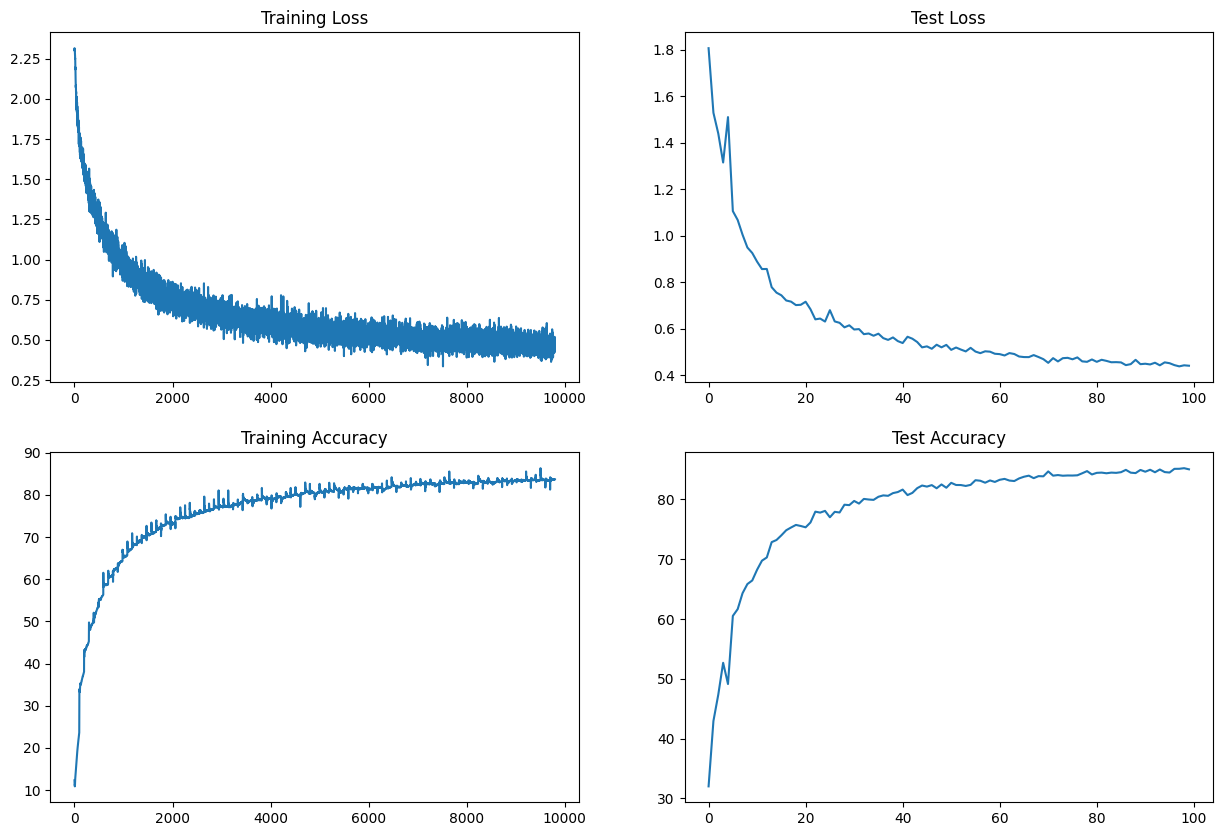

In [19]:
t = [t_items.item() for t_items in train_losses]
%matplotlib inline
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(t)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")